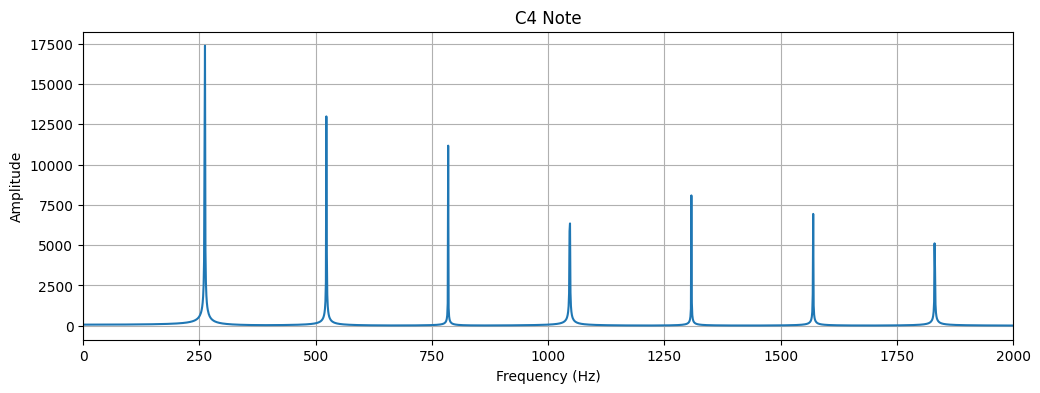

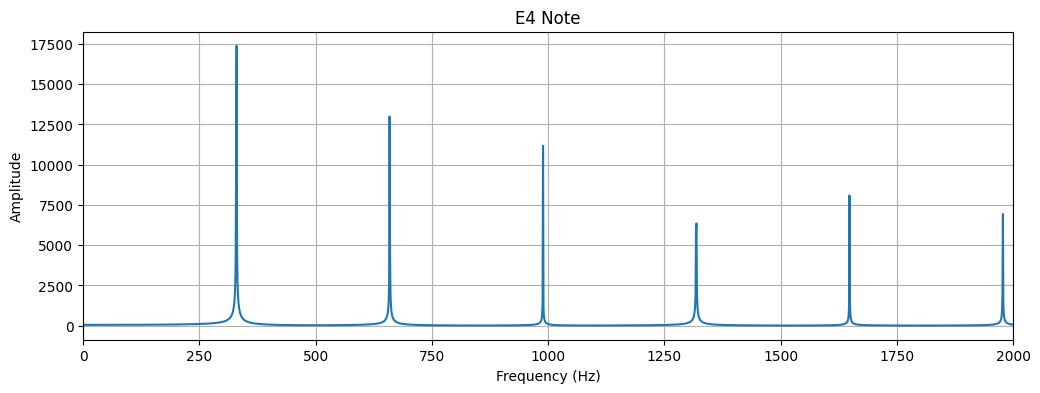

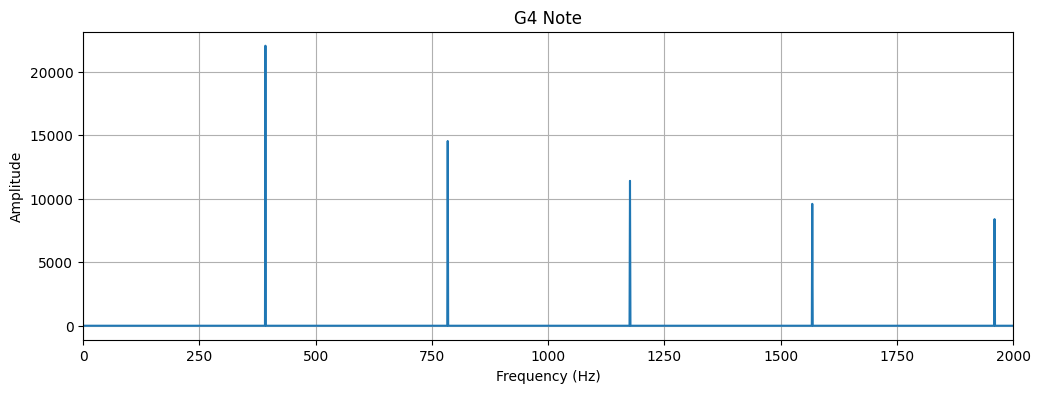

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 基本設定
sr = 44100  # サンプリングレート
T = 1.0     # 長さ（秒）
t = np.linspace(0, T, int(sr*T), endpoint=False)

# 音の周波数（例：C4=261.63Hz, E4=329.63Hz, G4=392.00Hz）
frequencies = {
    "C4": 261.63,
    "E4": 329.63,
    "G4": 392.00,
    "Eb4": 311.13
}

def synth_note(freq, harmonics=10, decay=0.6):
    """倍音付きの単音を合成"""
    wave = sum((1 / (n ** decay)) * np.sin(2 * np.pi * freq * n * t) for n in range(1, harmonics + 1))
    return wave

# メジャーコード（C-E-G）とマイナーコード（C-E♭-G）
major_chord = synth_note(frequencies["C4"]) + synth_note(frequencies["E4"]) + synth_note(frequencies["G4"])
minor_chord = synth_note(frequencies["C4"]) + synth_note(frequencies["Eb4"]) + synth_note(frequencies["G4"])

def plot_spectrum(signal, title):
    fft_result = np.abs(fft(signal))[:len(t)//2]
    freqs = fftfreq(len(t), 1/sr)[:len(t)//2]
    
    plt.figure(figsize=(12, 4))
    plt.plot(freqs, fft_result)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.xlim(0, 2000)
    plt.grid()
    plt.show()

# plot_spectrum(major_chord, "C Major Chord (C-E-G)")
# plot_spectrum(minor_chord, "C Minor Chord (C-E♭-G)")
plot_spectrum(synth_note(frequencies["C4"]), "C4 Note")
plot_spectrum(synth_note(frequencies["E4"]), "E4 Note")
plot_spectrum(synth_note(frequencies["G4"]), "G4 Note")

